In [1]:
import pandas as pd
import pandas_datareader as web
df=web.DataReader("GOOGL",data_source="yahoo",start="2009-01-01",end="2019--12-17")
print("shape of data",df.shape)
df.head()

shape of data (2760, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-31,155.655655,151.456451,152.252258,153.978973,5767800.0,153.978973
2009-01-02,161.071075,152.902908,154.454453,160.820816,7213700.0,160.820816
2009-01-05,165.785782,157.657654,160.660660,164.189194,9768200.0,164.189194
2009-01-06,170.570572,163.358353,166.656662,167.197205,12837500.0,167.197205
2009-01-07,165.620621,159.534531,164.324326,161.166168,8980000.0,161.166168


check for stationary

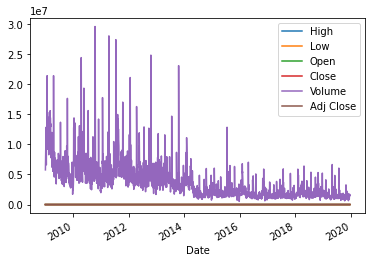

In [2]:
df.plot()
df1=df['Close']

check for stationary

In [3]:
def check_stationarity(ts_data):
    
    # Rolling statistics
    roll_mean = ts_data.rolling(20).mean()
    roll_std = ts_data.rolling(20).std()
    
    # Plot rolling statistics
    fig = plt.figure(figsize=(20,10))
    
    plt.plot(ts_data, color='blue', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean(20 days)')
    plt.plot(roll_std, color='black', label='Rolling Std Dev(20 days)')
    plt.legend(loc="best")
    plt.title("Rolling mean & rolling std")
    plt.show()

    dftest=adfuller(ts_data,autolag="AIC")
    print("ADF:",dftest[0])
    print("P-Value:",dftest[1])
    print("Num of Lags:",dftest[2])
    print("Num of observations used for ADF Regression and Critical Values Calculations:",dftest[3])
    print("Critical Values:")
    for key,values in dftest[4].items():
      print(key,":",values)


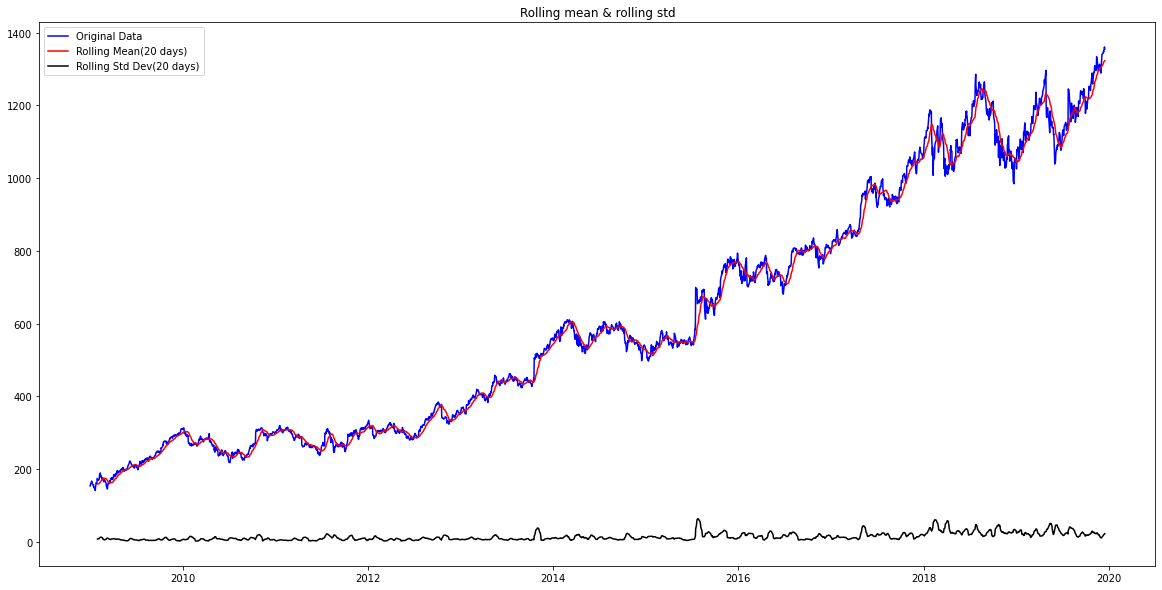

ADF: 0.507108374613484
P-Value: 0.9850875557467157
Num of Lags: 18
Num of observations used for ADF Regression and Critical Values Calculations: 2741
Critical Values:
1% : -3.4327379732269048
5% : -2.862595034666578
10% : -2.567331628897652


In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
check_stationarity(df1)

NOT STATIONARY because for stationary, ideally P-value(probability)< 0.05
When ADF> critical value, we fail to reject the null hypothesis (series is not stationary).

taking logrithmic transformation

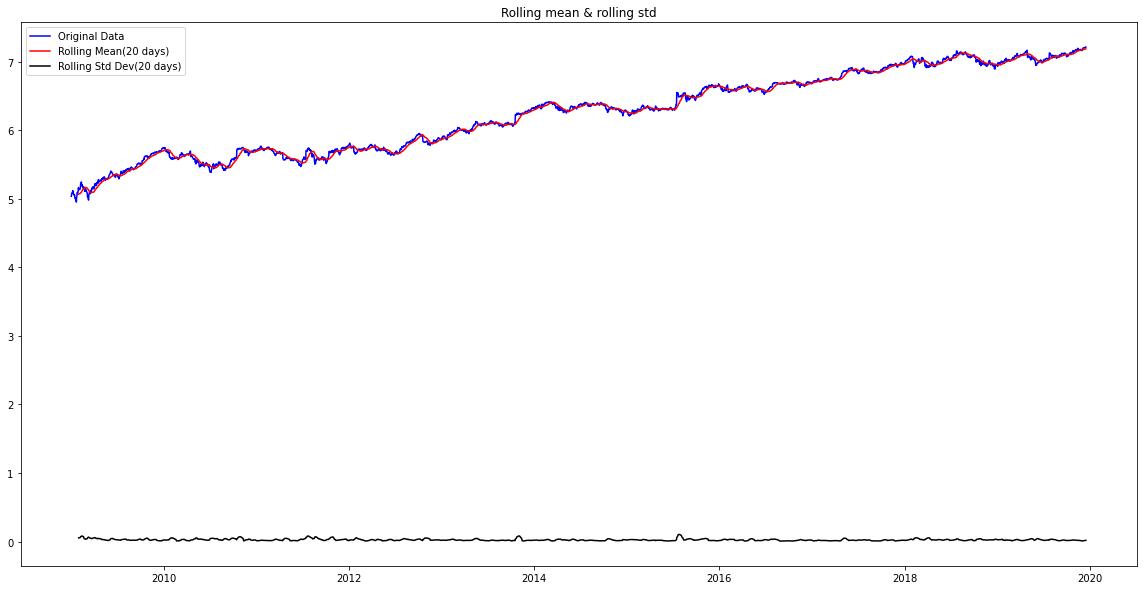

ADF: -1.283134638214829
P-Value: 0.6368524841633909
Num of Lags: 0
Num of observations used for ADF Regression and Critical Values Calculations: 2759
Critical Values:
1% : -3.432722379312635
5% : -2.8625881478340163
10% : -2.567327962349586


In [5]:
import numpy as np
df1_log = np.log(df1)
df1_log.dropna(inplace=True)
check_stationarity(df1_log)

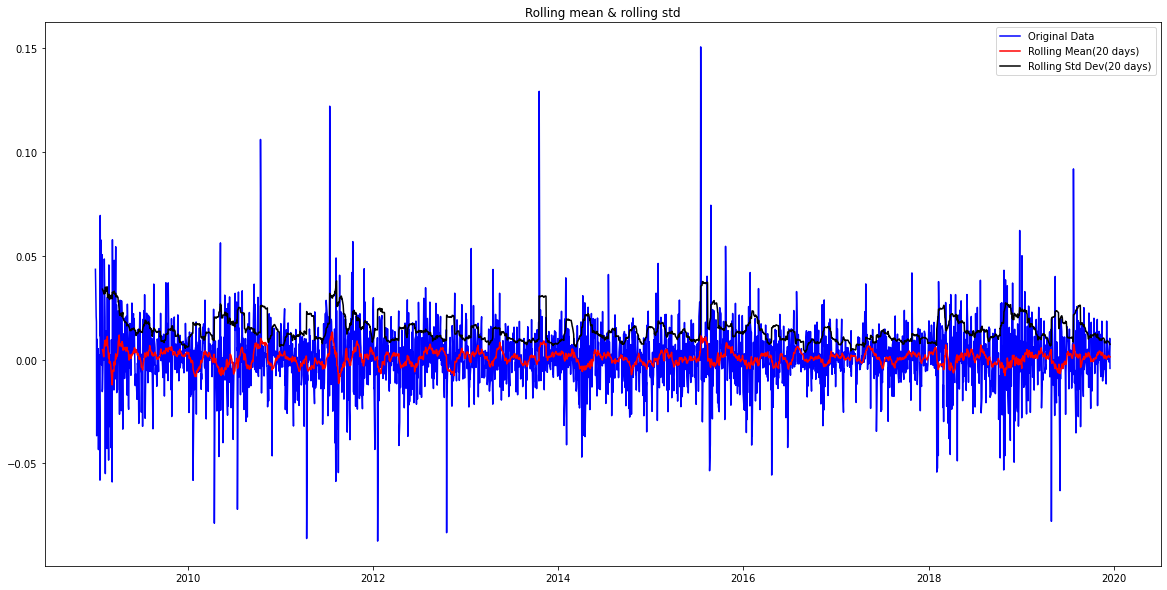

ADF: -52.23157931691285
P-Value: 0.0
Num of Lags: 0
Num of observations used for ADF Regression and Critical Values Calculations: 2758
Critical Values:
1% : -3.432723240296268
5% : -2.862588528076247
10% : -2.567328164790305


In [6]:
df1_log_diff =  df1_log - df1_log.shift()
df1_log_diff.dropna(inplace=True)
check_stationarity(df1_log_diff)

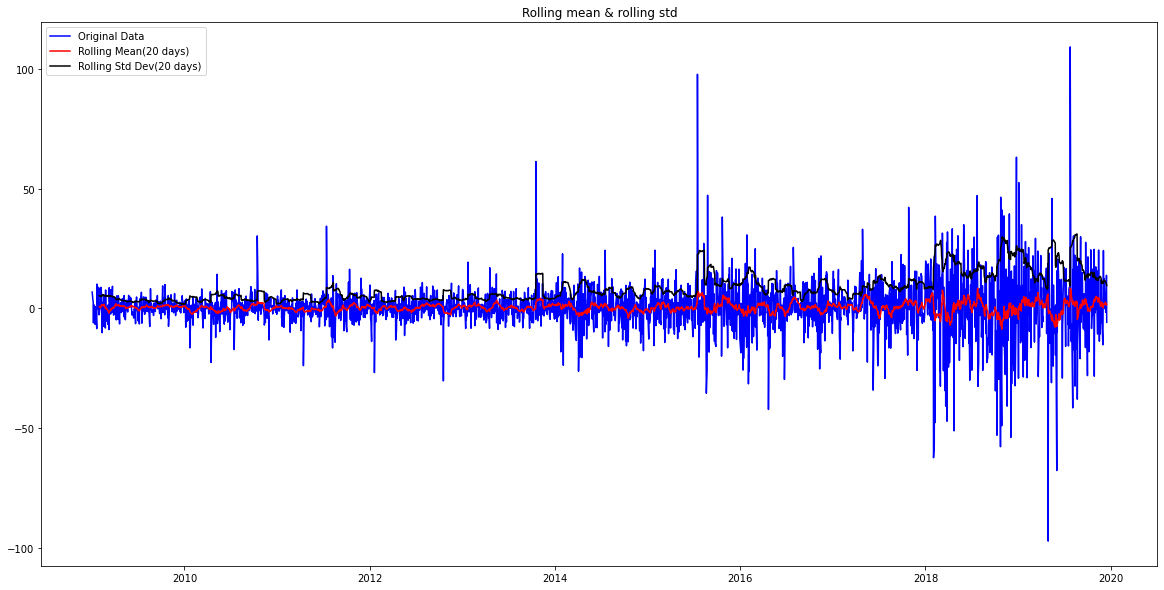

ADF: -12.328428808069079
P-Value: 6.50912296247143e-23
Num of Lags: 17
Num of observations used for ADF Regression and Critical Values Calculations: 2741
Critical Values:
1% : -3.4327379732269048
5% : -2.862595034666578
10% : -2.567331628897652


In [7]:
df1_diff =  df1 - df1.shift()
df1_diff.dropna(inplace=True)
check_stationarity(df1_diff)

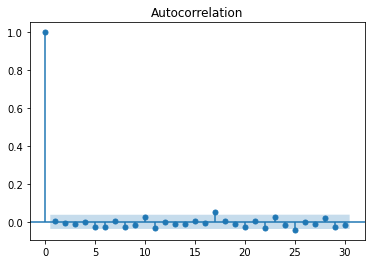

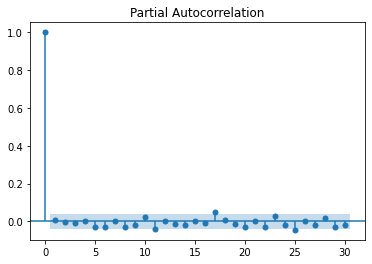

In [8]:
#for ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df1_log_diff,lags=30)
pacf = plot_pacf(df1_log_diff,lags=30)


In [9]:

from pmdarima import auto_arima 
import warnings 

warnings.filterwarnings("ignore") 
stepwise_fit = auto_arima(df1_log_diff,trace=True,suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-15097.312, Time=3.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-15105.131, Time=1.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-15103.244, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-15103.246, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-15100.144, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-15101.239, Time=1.79 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 9.284 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2759
Model:                        SARIMAX   Log Likelihood                7554.566
Date:                Sun, 27 Dec 2020   AIC                         -15105.131
Time:                        17:45:43   BIC                         -15093.286
Sample:                             0   HQIC                        -15100.852
                               - 2759                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.000      2.623      0.009       0.000       0.001
sigma2         0.0002   2.76e-06     88.865      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             10785.11
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.arima_model import ARIMA

train = df1_log_diff.iloc[:int(len(df)*0.80)] 
test =df1_log_diff.iloc[int(len(df)*0.80):]

model = ARIMA(df1_log_diff, order=(0,1,0)) 
fit_model=model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2758
Model:                 ARIMA(0, 1, 0)   Log Likelihood                6606.246
Method:                           css   S.D. of innovations              0.022
Date:                Sun, 27 Dec 2020   AIC                         -13208.492
Time:                        17:49:25   BIC                         -13196.648
Sample:                             1   HQIC                        -13204.213
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.732e-05      0.000     -0.041      0.967      -0.001       0.001
==============================================================================
"""

<AxesSubplot:xlabel='Date'>

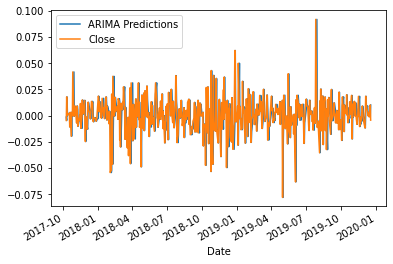

In [13]:
start = len(train) 
end = len(train) + len(test) - 1
  
predictions = fit_model.predict(start=start, end=end,typ = 'levels').rename("ARIMA Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test.plot(legend = True) 


<AxesSubplot:xlabel='Date'>

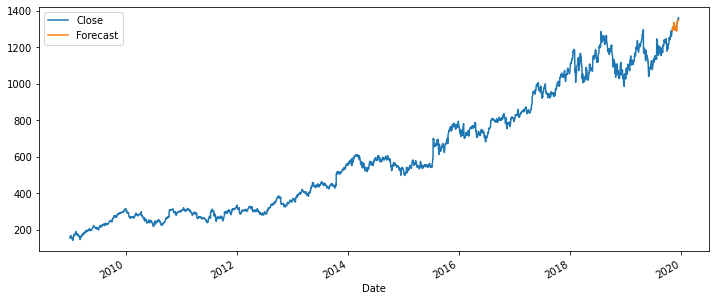

In [12]:
model = ARIMA(df1,order = (0, 1, 0))
result = model.fit() 
  
# Forecast for the next 1 year 

forecast = result.predict(start =start,end =end,typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df1.plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 


In [14]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tools.eval_measures import rmse 
  
print('RMSE ', round(sqrt(mean_squared_error(test,predictions)),5))
print("mean_absolute_error",round(mean_absolute_error(predictions, test),5))
print("mean_percent_absolute_error",round(np.mean(np.abs((predictions- test) / predictions)) * 100,5))



RMSE  0.02263
mean_absolute_error 0.0162
mean_percent_absolute_error 787.42985
